In [14]:
import numpy as np
from astropy import units as u
from astropy import constants as const
import xcorr
from powerbox import get_power
import matplotlib.pyplot as plt

/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [15]:
from astropy.cosmology import Planck15
from astropy.cosmology import WMAP5

In [26]:
z = np.logspace(2, 10, 100)

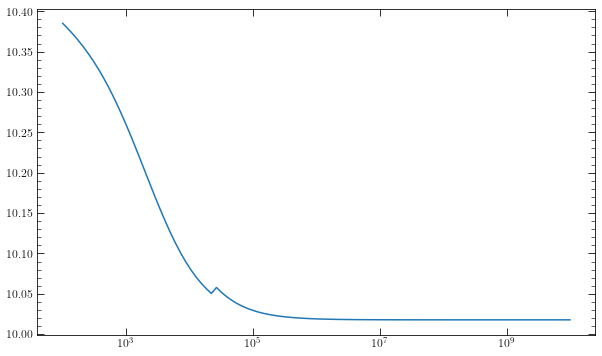

In [27]:
plt.figure(figsize = (10,6))
plt.plot(z, 10 ** (WMAP5.age(z = z) / Planck15.age(z = z)))
plt.xscale('log')
#plt.yscale('log')
plt.show()

In [26]:
def I(nu, Tb):
    """
    """
    I_21 = (2. * const.h * nu ** 3 / const.c ** 2) * (np.exp(const.h * nu / (const.k_B * Tb)) - 1.) ** -1
    return (nu * I_21).to(u.erg / u.s / u.cm ** 2)

In [34]:
z = np.linspace(4., 10., 100)
nu = 1420. * u.MHz / (1. + z)
Tb = 1 * u.mK

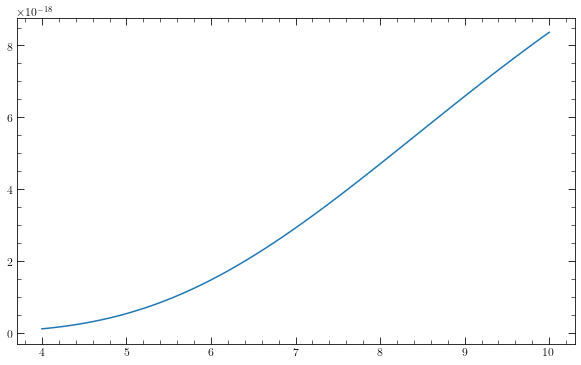

In [37]:
plt.figure(figsize = (10, 6))
plt.plot(z, I(nu, Tb))
plt.show()